## Gather

In [2]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [3]:
with open("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

In [3]:
#import files
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [7]:
#The keys and tokens are hidden as the codes here are only for review purpose.
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [11]:
#gather tweet IDs in order to get data from Twitter's API
tweet_ids = twitter_archive.tweet_id.values

In [ ]:
#query Twitter's API for json data for each tweet ID
count = 0
fails_dict = {}
start = timer()
with open ('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
tweet_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
   for line in f:
       status  = json.loads(line)
       tweet_id = status['id_str']
       retweet_count = status['retweet_count']
       favorite_count = status['favorite_count'] 
       tweet_json = tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],columns=['tweet_id', 'retweet_count', 'favorite_count'])).reset_index(drop=True)

## Assess

In [5]:
twitter_archive.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [5]:
#notice some tweets are actually retweets
twitter_archive[twitter_archive.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [8]:
#errorneous datatype 
###in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_timestamp
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7431,35236
1,892177421306343426,5526,30502
2,891815181378084864,3647,22935
3,891689557279858688,7608,38520
4,891327558926688256,8192,36794


In [11]:
tweet_json.retweet_count.sort_values(ascending=False)

1015    75006
1055    55847
517     54683
397     42196
65      39401
433     36307
430     36307
520     34174
129     31885
1741    30287
1805    29311
158     28341
848     28341
162     27694
289     26602
443     26602
111     23854
606     23323
639     21926
148     21083
1601    20858
636     20858
512     20593
434     20593
1053    20394
296     20280
915     20280
432     18687
431     18687
1717    17937
        ...  
273        33
2312       32
2302       31
2234       31
863        30
2199       29
943        27
2235       27
593        26
1213       25
393        22
180        22
2164       21
203        19
2294       18
172        17
1499       17
178        15
2273       13
2314       11
63         10
411        10
54          7
1056        6
29          4
109         3
328         2
1271        2
262         2
279         1
Name: retweet_count, Length: 2331, dtype: object

In [9]:
tweet_json.favorite_count.sort_values(ascending=False)

0    151763
0    129498
0    117173
0    113458
0    112214
0     96762
0     85951
0     84220
0     76956
0     76867
0     73958
0     72875
0     72497
0     70312
0     69154
0     66262
0     65453
0     62750
0     60437
0     59347
0     56004
0     52299
0     51680
0     50981
0     49184
0     48569
0     48429
0     46344
0     45261
0     44795
      ...  
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
0         0
Name: favorite_count, Length: 2331, dtype: object

In [11]:
#notice some tweet has very high retweets but 0 favorites, which don't really make sense
tweet_json[tweet_json.favorite_count==0]

,tweet_id,retweet_count,favorite_count
0,886054160059072513,96,0
0,885311592912609280,16285,0
0,879130579576475649,6012,0
0,878404777348136964,1126,0
0,878316110768087041,5860,0
0,877611172832227328,70,0
0,874434818259525634,12864,0
0,873337748698140672,1403,0
0,871166179821445120,5105,0
0,868639477480148993,1854,0


In [7]:
tweet_json[tweet_json.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [66]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null object
favorite_count    2331 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


In [ ]:
#lowercase and uppercase in p1,p2,p3 - inconsistency
image_predictions

In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
len(tweet_json.tweet_id.values)

2331

In [10]:
len(twitter_archive.tweet_id.values)

2356

### Quality
#### twitter_archive table
- in the dog name column, there are values that are not dog names, such as "a", "such", etc. These values are all lowercase characters, and need to be dropped if the name is not availbe in the text column.
- in the source column, url need to be removed and only left with the categories. And the type of the source column should be category.
- some tweets are actually retweets and these should only be counted once.
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are float types. They should be string type. At the same time, timestamp is string type data which needs to be datetime type data.
- in the rating_denominator column, some denominators don't match with the amounts in the text column. These need to be updated with the correct ratings.
- in the rating_numerator column, some numerators don't match with the amounts in the text column. These need to be updated with the correct ratings.

#### image_prediction table
- lower case dog name in the dog breeds columns (p1, p2, p3). 
- there are some images that are not dogs.

#### tweet_json table
- retweet and favorite count should be integers not floats.

### Tidiness
- dog stage are separated into 4 columns. Instead the 4 variables should be included in one column - dog stage.
- these 3 tables should be merged as one master file.

## Clean

In [5]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

#### Quality Issue 1
#### Define
Lowercase names in the name column happens to be "a", "such", "not" instead of actual names. Remove the lowercase names using tilde.
#### Code

In [6]:
twitter_archive_clean[twitter_archive_clean.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [7]:
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.name.str.islower()]

#### Test

In [187]:
twitter_archive_clean[twitter_archive_clean.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Quality Issue 2
#### Define
In the source column, url needs to be removed. Use str.extract to extract the source and change the type to category.
#### Code

In [8]:
twitter_archive_clean.source = twitter_archive_clean.source.str.extract('([TV]{1}.*(?:<))', expand=True)
twitter_archive_clean.source = twitter_archive_clean.source.str.replace('<', '')

In [9]:
twitter_archive_clean.source.astype('category')

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
19      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
30      Twitter for iPhone
               ...        
2310    Twitter for iPhone
2312    Twitter for iPhone
2313    Twitter for iPhone
2315    Twitter for iPhone
2316    Twitter for iPhone
2317    Twitter for iPhone
2

#### Test

In [10]:
twitter_archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### Quality Issue 3
#### Define
Some tweets are actually retweets and these should only be counted once. Use tilde and notnull() to drop the retweets.
#### Code


In [11]:
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.retweeted_status_id.notnull()]

#### Test

In [12]:
twitter_archive_clean.retweeted_status_id.notnull().sum()

0

#### Quality Issue 4
#### Define
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be string type. Timestamp should be datetime type.
#### Code


In [13]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype(str)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype(str)
twitter_archive_clean.retweeted_status_id = twitter_archive_clean.retweeted_status_id.astype(str)
twitter_archive_clean.retweeted_status_user_id = twitter_archive_clean.retweeted_status_user_id.astype(str)
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [14]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2071 non-null object
in_reply_to_status_id         2071 non-null object
in_reply_to_user_id           2071 non-null object
timestamp                     2071 non-null datetime64[ns]
source                        2071 non-null object
text                          2071 non-null object
retweeted_status_id           2071 non-null object
retweeted_status_user_id      2071 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2013 non-null object
rating_numerator              2071 non-null int64
rating_denominator            2071 non-null int64
name                          2071 non-null object
doggo                         2071 non-null object
floofer                       2071 non-null object
pupper                        2071 non-null object
puppo                         2071 non-null object
dtypes: datetime64[ns](

#### Quality Issue 5
#### Define
in the rating_denominator column, not all the values equal to 10. After investigating the values, some denominators don't match with the denominator in the text column. We will use loc to change the denominators into the correct amounts. Some tweet don't provide a rating in the text column such as ID:810984652412424000. We will drop these. Other denominators such as the 50 for ID: 709198395643068000 actually makes sense since it's for 5 puppies. In this case, we will leave it as is.
#### Code

In [15]:
twitter_archive_clean.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.35245984029e+17,26259576.0,2017-02-24 21:54:03,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,nan,nan,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.3208754756e+17,30582082.0,2017-02-16 04:45:50,Twitter for iPhone,@docmisterio account started on 11/15/15,nan,nan,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,nan,nan,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,nan,nan,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,nan,nan,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,nan,nan,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,nan,nan,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,nan,nan,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,nan,nan,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",nan,nan,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1165,722974582966214656,nan,nan,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,nan,nan,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,nan,nan,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,nan,nan,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,nan,nan,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,nan,nan,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,nan,nan,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,nan,nan,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [16]:
twitter_archive_clean.query('rating_denominator != 10')['rating_denominator'].sort_values()

313       0
516       7
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1274     50
433      70
1254     80
1843     80
1228     90
1635    110
1779    120
1634    130
902     150
Name: rating_denominator, dtype: int64

In [17]:
#drop the tweets which don't have ratings in the text column
twitter_archive_clean.drop([516,342], inplace=True)

In [18]:
#replace the denominators that don't match with the denominators in the text column
twitter_archive_clean.loc[[313,1068,1165,1662,1202],"rating_denominator"]=10

#### Test

In [19]:
twitter_archive_clean.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,nan,nan,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,nan,nan,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,nan,nan,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,nan,nan,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1228,713900603437621249,nan,nan,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,nan,nan,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,nan,nan,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,nan,nan,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,nan,nan,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",nan,nan,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1433,697463031882764288,nan,nan,2016-02-10 16:51:59,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40...,nan,nan,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1598,686035780142297088,6.86034024801e+17,4196983835.0,2016-01-10 04:04:10,Twitter for iPhone,Yes I do realize a rating of 4/20 would've bee...,nan,nan,NaN,NaN,4,20,None,None,None,None,None
1634,684225744407494656,6.84222868336e+17,4196983835.0,2016-01-05 04:11:44,Twitter for iPhone,"Two sneaky puppers were not initially seen, mo...",nan,nan,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,nan,nan,2016-01-05 04:00:18,Twitter for iPhone,Someone help the girl is being mugged. Several...,nan,nan,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1663,682808988178739200,6.82788441538e+17,4196983835.0,2016-01-01 06:22:03,Twitter for iPhone,"I'm aware that I could've said 20/16, but here...",nan,nan,NaN,NaN,20,16,None,None,None,None,None


#### Quality Issue 6
#### Define
in the rating_numerator column, some values don't match with the amounts in the text column. We will use loc to change the numerator into the correct amounts. Some rating numerator is too high such as 1,776, which can be considered as an outlier. We will drop these. 
#### Code

In [20]:
#replace the numerator with the correct amounts per text column
twitter_archive_clean.loc[313,"rating_numerator"]=13
twitter_archive_clean.loc[1068,"rating_numerator"]=14
twitter_archive_clean.loc[1165,"rating_numerator"]=13
twitter_archive_clean.loc[1662,"rating_numerator"]=10
twitter_archive_clean.loc[1202,"rating_numerator"]=11

In [21]:
#notice nominators showing as float are extracted only the digit part. this is to update the nominators which are floats
twitter_archive_clean.loc[45,"rating_numerator"]=13.5
twitter_archive_clean.loc[695,"rating_numerator"]=9.75
twitter_archive_clean.loc[763,"rating_numerator"]=11.27
twitter_archive_clean.loc[1712,"rating_numerator"]=11.26
twitter_archive_clean.loc[1689,"rating_numerator"]=9.5

In [22]:
#drop the tweet which has rating numerator as 1776
twitter_archive_clean.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,nan,nan,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,nan,nan,NaN,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,None,None,None,None


In [23]:
twitter_archive_clean.drop(979, inplace=True)

#### Test

In [24]:
twitter_archive_clean.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [25]:
twitter_archive_clean.loc[[45,695,763,313,1068,1165,1202,1662,1689,1712],]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,nan,nan,2017-07-08 00:28:19,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,nan,nan,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,None,None,None,None
695,786709082849828864,nan,nan,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",nan,nan,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
763,778027034220126208,nan,nan,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,nan,nan,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None
313,835246439529840640,8.35245984029e+17,26259576.0,2017-02-24 21:54:03,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,nan,nan,NaN,NaN,13.00,10,None,None,None,None,None
1068,740373189193256964,nan,nan,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",nan,nan,NaN,https://twitter.com/dog_rates/status/740373189...,14.00,10,None,None,None,None,None
1165,722974582966214656,nan,nan,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,nan,nan,NaN,https://twitter.com/dog_rates/status/722974582...,13.00,10,None,None,None,None,None
1202,716439118184652801,nan,nan,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,nan,nan,NaN,https://twitter.com/dog_rates/status/716439118...,11.00,10,Bluebert,None,None,None,None
1662,682962037429899265,nan,nan,2016-01-01 16:30:13,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,nan,nan,NaN,https://twitter.com/dog_rates/status/682962037...,10.00,10,Darrel,None,None,None,None
1689,681340665377193984,6.81339448656e+17,4196983835.0,2015-12-28 05:07:27,Twitter for iPhone,I've been told there's a slight possibility he...,nan,nan,NaN,NaN,9.50,10,None,None,None,None,None
1712,680494726643068929,nan,nan,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,nan,nan,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None


#### Quality Issue 7
#### Define
image_prediction table - lower case dog name in the dog breeds columns (p1, p2, p3). We will use applymap to fix this issue. 
#### Code

In [26]:
image_predictions_clean[['p1','p2','p3']] = image_predictions_clean[['p1','p2','p3']].applymap(lambda x:x.capitalize())

#### Test

In [27]:
image_predictions_clean.p1.unique()

array(['Welsh_springer_spaniel', 'Redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'Miniature_pinscher', 'Bernese_mountain_dog',
       'Box_turtle', 'Chow', 'Shopping_cart', 'Miniature_poodle',
       'Golden_retriever', 'Gordon_setter', 'Walker_hound', 'Pug',
       'Bloodhound', 'Lhasa', 'English_setter', 'Hen', 'Desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'Three-toed_sloth', 'Ox',
       'Malamute', 'Guinea_pig', 'Soft-coated_wheaten_terrier',
       'Chihuahua', 'Black-and-tan_coonhound', 'Coho', 'Toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Llama', 'Chesapeake_bay_retriever',
       'Curly-coated_retriever', 'Dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'Seat_belt', 'Snail',
       'Miniature_schnauzer', 'Airedale', 'Triceratops', 'Swab', 'Hay',
       'Hyena', 'Jigsaw_puzzle', 'West_highland_white_terrier',
       'Toy_poodle', 'Giant_schnauzer', 'Vizsla', 'Vacuum', 'Rottweiler',
       'Siberian_husky', 'Teddy', 

In [28]:
image_predictions_clean.p2.unique()

array(['Collie', 'Miniature_pinscher', 'Malinois', 'Redbone', 'Rottweiler',
       'English_springer', 'Mud_turtle', 'Tibetan_mastiff',
       'Shopping_basket', 'Komondor', 'Yorkshire_terrier',
       'English_foxhound', 'Bull_mastiff', 'German_shepherd', 'Shih-tzu',
       'Newfoundland', 'Cock', 'Desk', 'Toy_terrier', 'Toy_poodle',
       'Otter', 'Chesapeake_bay_retriever', 'Siberian_husky', 'Skunk',
       'Afghan_hound', 'Bloodhound', 'Barracouta', 'Papillon',
       'Cocker_spaniel', 'Chow', 'Irish_terrier', 'Chain_saw', 'Beagle',
       'Giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'Slug', 'Brittany_spaniel', 'Standard_schnauzer',
       'Teddy', 'Armadillo', 'African_hunting_dog', 'Vizsla', 'Doormat',
       'Pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'Miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'Swab',
       'Malamute', 'Bath_towel', 'Border_collie', 'Leonberg', 'Drake',
       'French_bulldog', 'Ice_bear', 

In [29]:
image_predictions_clean.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'Bloodhound',
       'Miniature_pinscher', 'Doberman', 'Greater_swiss_mountain_dog',
       'Terrapin', 'Fur_coat', 'Golden_retriever',
       'Soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'Malinois', 'Dandie_dinmont',
       'Borzoi', 'Partridge', 'Bookcase', 'Basenji', 'Miniature_poodle',
       'Great_grey_owl', 'Groenendael', 'Eskimo_dog', 'Hamster', 'Briard',
       'Papillon', 'Flat-coated_retriever', 'Gar', 'Chihuahua', 'Shih-tzu',
       'Pomeranian', 'Dingo', 'Power_drill', 'Saluki', 'Great_pyrenees',
       'West_highland_white_terrier', 'Collie', 'Toy_poodle', 'Vizsla',
       'Acorn', 'Giant_schnauzer', 'Teddy', 'Common_iguana', 'Wig',
       'Water_buffalo', 'Coyote', 'Seat_belt', 'Kelpie', 'Space_heater',
       'Brabancon_griffon', 'Standard_poodle', 'Beagle',
       'Irish_water_spaniel', 'Bluetick', 'Weimaraner',
       'Chesapeake_bay_retriever', 'Toilet_tiss

#### Quality Issue 8
#### Define
tweet_json table - retweet and favorite count should be integers not floats.
#### Code

In [30]:
tweet_json.retweet_count = tweet_json.retweet_count.astype(int)
tweet_json.favorite_count = tweet_json.favorite_count.astype(int)

#### Test

In [31]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


#### Tidiness Issue 1
#### Define
create a column called dog_stage which includes different dog stages such as doggo, floofer using applymap and loc function.
#### Code

In [32]:
twitter_archive_clean[['doggo','floofer','pupper','puppo']] = twitter_archive_clean[['doggo','floofer','pupper','puppo']].applymap(lambda x:x.replace('None',''))

In [33]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

In [34]:
twitter_archive_clean.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [35]:
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

In [36]:
twitter_archive_clean.drop(['doggo', 'floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [37]:
twitter_archive_clean.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

#### Tidiness Issue 2
#### Define
image_prediction table - select the images that belongs to dog breed, and select the best prediction, using loop - if statements. This is to assist the data analysis stage.
#### Code

In [38]:
dog_prediction=[]
for i in range(len(image_predictions_clean)):
    if image_predictions_clean.p1_dog[i] == True:
        dog_prediction.append(image_predictions_clean.p1[i])
    elif image_predictions_clean.p2_dog[i] == True:
        dog_prediction.append(image_predictions_clean.p2[i])
    elif image_predictions_clean.p3_dog[i] == True:
        dog_prediction.append(image_predictions_clean.p3[i])
    else:
        dog_prediction.append(np.nan)

In [39]:
len(dog_prediction)

2075

In [40]:
image_predictions_clean.shape[0]

2075

In [41]:
image_predictions_clean['dog_prediction'] = dog_prediction

#### Test

In [42]:
image_predictions_clean[['dog_prediction', 'p1', 'p1_dog']]

,dog_prediction,p1,p1_dog
0,Welsh_springer_spaniel,Welsh_springer_spaniel,True
1,Redbone,Redbone,True
2,German_shepherd,German_shepherd,True
3,Rhodesian_ridgeback,Rhodesian_ridgeback,True
4,Miniature_pinscher,Miniature_pinscher,True
5,Bernese_mountain_dog,Bernese_mountain_dog,True
6,NaN,Box_turtle,False
7,Chow,Chow,True
8,Golden_retriever,Shopping_cart,False
9,Miniature_poodle,Miniature_poodle,True


#### Tidiness Issue 3
#### Define
merge these three tables and store into a main file called twitter_archive_master.csv using merge.
#### Code

In [43]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id          2075 non-null int64
jpg_url           2075 non-null object
img_num           2075 non-null int64
p1                2075 non-null object
p1_conf           2075 non-null float64
p1_dog            2075 non-null bool
p2                2075 non-null object
p2_conf           2075 non-null float64
p2_dog            2075 non-null bool
p3                2075 non-null object
p3_conf           2075 non-null float64
p3_dog            2075 non-null bool
dog_prediction    1751 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 168.3+ KB


In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2068 non-null object
in_reply_to_status_id         2068 non-null object
in_reply_to_user_id           2068 non-null object
timestamp                     2068 non-null datetime64[ns]
source                        2068 non-null object
text                          2068 non-null object
retweeted_status_id           2068 non-null object
retweeted_status_user_id      2068 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2011 non-null object
rating_numerator              2068 non-null float64
rating_denominator            2068 non-null int64
name                          2068 non-null object
dog_stage                     2068 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 322.3+ KB


In [45]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [46]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

In [47]:
df_temp_clean = pd.merge(twitter_archive_clean, tweet_json_clean, how = 'left', on = ['tweet_id'])
twitter_archive_master = pd.merge(df_temp_clean, image_predictions_clean, how = 'left', on = ['tweet_id'])

In [48]:
twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_prediction
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,...,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,Chihuahua
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,Chihuahua
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,...,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,Labrador_retriever
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,...,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Basset
5,891087950875897856,nan,nan,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,...,Chesapeake_bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_bay_retriever
6,890971913173991426,nan,nan,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Appenzeller,0.341703,True,Border_collie,0.199287,True,Ice_lolly,0.193548,False,Appenzeller
7,890729181411237888,nan,nan,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,nan,nan,NaN,https://twitter.com/dog_rates/status/890729181...,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,Pomeranian
8,890609185150312448,nan,nan,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185...,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_bay_retriever,0.118184,True,Irish_terrier
9,890240255349198849,nan,nan,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,Pembroke


In [49]:
twitter_archive_master.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','p1','p2','p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'], axis=1, inplace=True)

#### Store Data

In [50]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

### Analysis and Data Visualization
### Analysis
After cleaning the data, we can bein explore the insights from the data analysis process. The analysis will include creation of visualization to gain a better insight.

In [51]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 14 columns):
tweet_id              2068 non-null object
timestamp             2068 non-null datetime64[ns]
source                2068 non-null object
text                  2068 non-null object
expanded_urls         2011 non-null object
rating_numerator      2068 non-null float64
rating_denominator    2068 non-null int64
name                  2068 non-null object
dog_stage             2068 non-null object
retweet_count         2061 non-null object
favorite_count        2061 non-null object
jpg_url               1894 non-null object
img_num               1894 non-null float64
dog_prediction        1605 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 242.3+ KB


### Insight 1
We will also analyze how active WeRateDogs account is from the timestamp data available. This will be assess using how many tweets the account posts per month over the years from 2015 to 2017. From the below analysis, we notice that the account is more active in 2015 to 2016, and less active the end of 2017. The sharp increase may be related to a celebrated exchange in which the account shut down a person taking issue with the rating system.

In [52]:
twitter_archive_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_prediction
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,7431,35236,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,5526,30502,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua


In [53]:
twitter_archive_master['YM'] = twitter_archive_master.timestamp.dt.to_period('M')

In [54]:
df_ym = twitter_archive_master.groupby('YM')['tweet_id'].count().reset_index()
df_ym.head()

,YM,tweet_id
0,2015-11,263
1,2015-12,366
2,2016-01,191
3,2016-02,117
4,2016-03,134


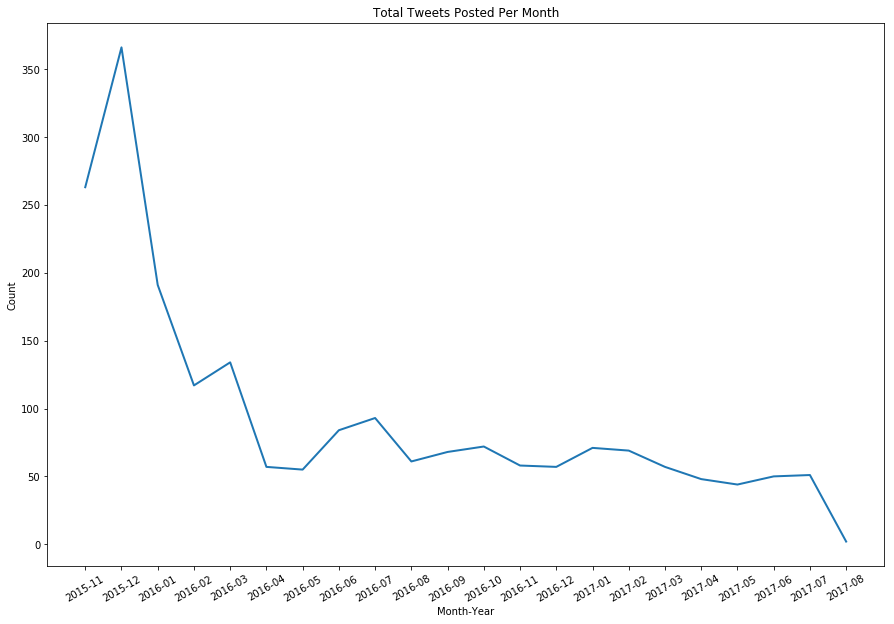

In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
x = df_ym.YM.astype(str)
y = df_ym.tweet_id
plt.plot(x, y, linewidth=2,)
plt.title('Total Tweets Posted Per Month')
plt.xlabel('Month-Year')
plt.ylabel('Count');
plt.xticks(rotation=30);

### Insight 2 - Most common dog breeds
The dog breed comes from a machine learning algorithm trained by a neural network. It classifies breeds of dogs and these algorithms are not 100% accurate.

In [58]:
top_breed = (twitter_archive_master.dog_prediction.value_counts()
             .head(15)
             .reset_index()
             .rename(columns={'index':'dog_prediction', 'dog_prediction':'total'}))
top_breed

,dog_prediction,total
0,Golden_retriever,151
1,Labrador_retriever,105
2,Pembroke,91
3,Chihuahua,89
4,Pug,58
5,Toy_poodle,47
6,Chow,45
7,Samoyed,40
8,Pomeranian,39
9,French_bulldog,31


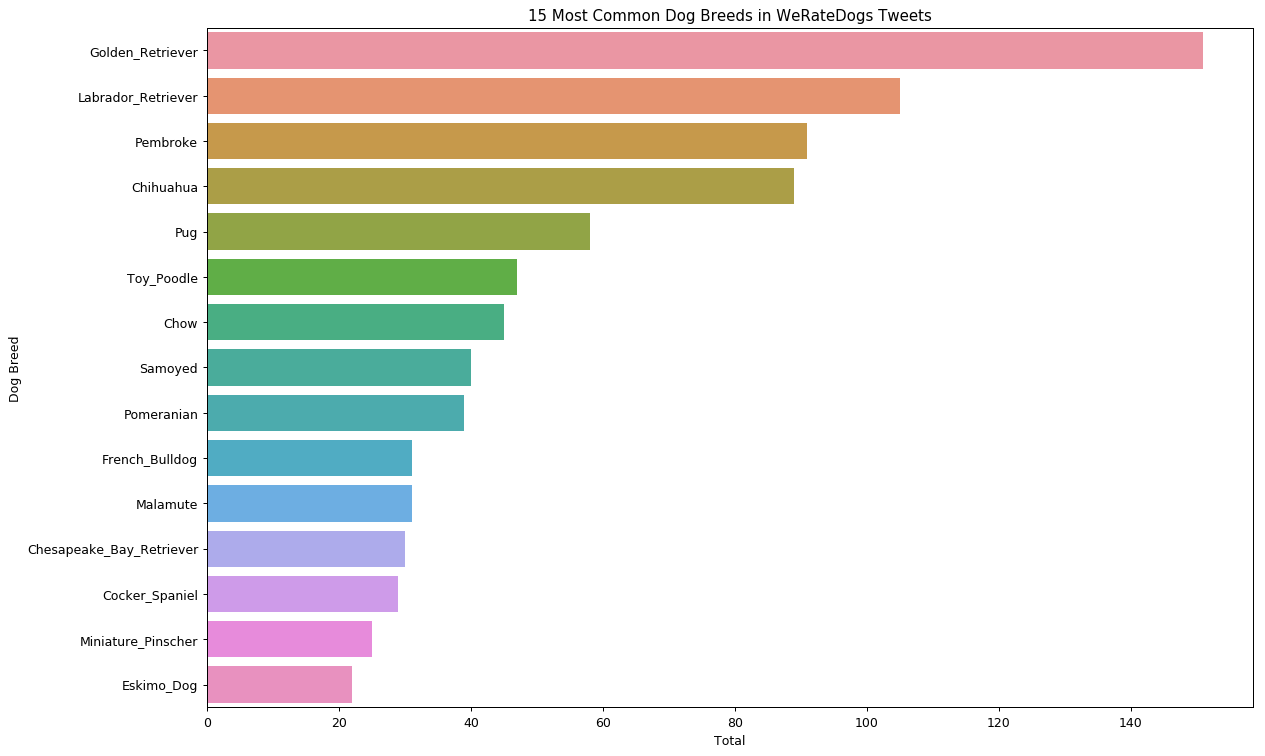

In [59]:
top_breed['dog_prediction'] = top_breed['dog_prediction'].str.title()
plt.figure(dpi=90);
ax = sns.barplot(x='total', y='dog_prediction', data = top_breed);
ax.set_title('15 Most Common Dog Breeds in WeRateDogs Tweets');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Total');

### Insight 3
Since the denominators are not consistent amoung the ratings, we decided to calculate the rating divded rating_numerator by rating_denominator. And we selected the top 10 ratings dog breed and plot the result into a bar chart. Black and tan coonhound is the top 1 rated dog breed, and Bouvier des fiandres is the second rated dog breed.

In [60]:
twitter_archive_master['rating'] = twitter_archive_master.rating_numerator / twitter_archive_master.rating_denominator

In [61]:
df_rating = twitter_archive_master.groupby(['dog_prediction'], as_index=False)['rating'].mean().nlargest(10, columns=['rating'])
df_rating

,dog_prediction,rating
10,Black-and-tan_coonhound,1.400000
18,Bouvier_des_flandres,1.300000
87,Saluki,1.250000
21,Briard,1.233333
101,Tibetan_mastiff,1.225000
15,Border_terrier,1.214286
95,Silky_terrier,1.200000
99,Standard_schnauzer,1.200000
52,Irish_setter,1.175000
88,Samoyed,1.165000


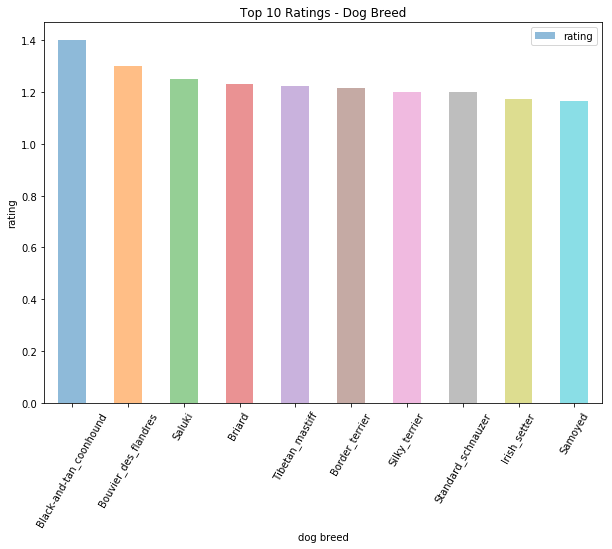

In [63]:
df_rating.plot.bar(x='dog_prediction', y='rating', alpha=.5, figsize=(10,7))
plt.title('Top 10 Ratings - Dog Breed')
plt.xlabel('dog breed')
plt.ylabel('rating')
plt.xticks(rotation=60);